## create a connection to the database using the library sqlite3

In [3]:
import pandas as pd
import sqlite3

In [48]:
conn = sqlite3.connect('../ex00/data/checking-logs.sqlite.sqlite copy')

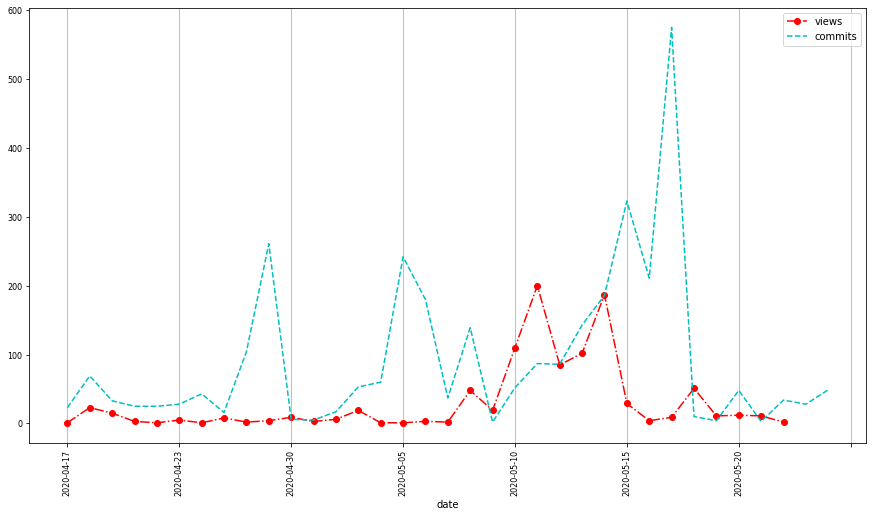

In [69]:
visits = pd.io.sql.read_sql("""
SELECT strftime("%Y-%m-%d",datetime) AS date, COUNT(strftime("%Y-%m-%d",datetime)) AS views
FROM pageviews
WHERE uid LIKE "user_%"
GROUP BY strftime("%Y-%m-%d",datetime)
""", conn)
commits = pd.io.sql.read_sql("""
SELECT strftime("%Y-%m-%d",timestamp) AS timestamp, COUNT(strftime("%Y-%m-%d",timestamp)) AS commits
FROM checker
WHERE uid LIKE "user_%"
GROUP BY strftime("%Y-%m-%d",timestamp)
""", conn)
ax = visits.plot(style=['ro-.'], figsize=(15,8),  fontsize=8, x='date', rot=90)
subplot = commits.plot(style=['c--'], ax=ax, rot=90, grid='date')
subplot.grid(axis='y')


In [70]:
visits[visits['views'] > 150].count().values[0]

2

## “How many times was the number of views larger than 150?” “The answer is 2”.

<AxesSubplot:xlabel='date'>

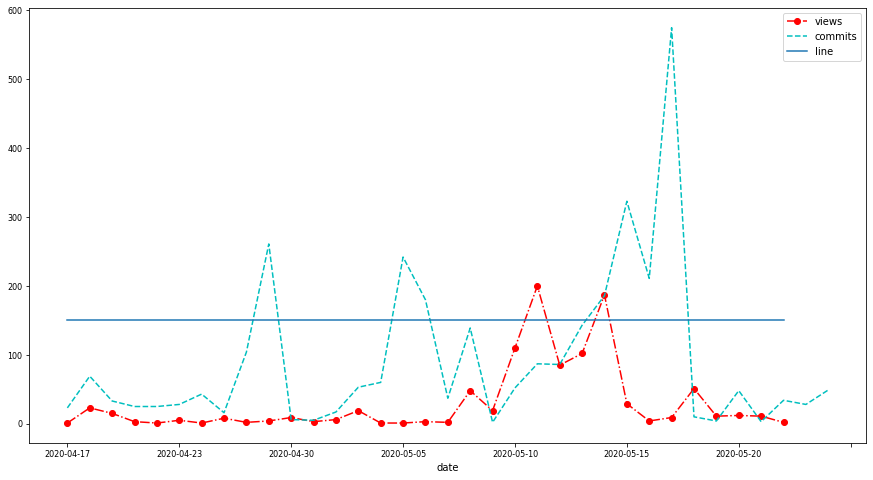

In [76]:
ax = visits.plot(style=['ro-.'], figsize=(15,8),  fontsize=8, x='date', rot=90)
subplot = commits.plot(style=['c--'], ax=ax, rot=90, grid='date')
subplot.grid(axis='y')
line = pd.DataFrame(visits['date'])
line['line'] = 150
line.plot(ax=ax)

In [77]:
conn.close()